<a href="https://colab.research.google.com/github/DaanaGtz/Estadistica/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TECNOLOGICO NACIONAL DE MEXICO**
##**INSTITUTO TECNOLOGICO DE AGUSCALIENTES**


---




 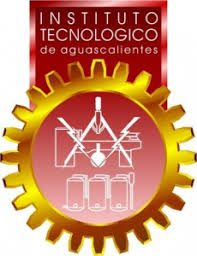

##**INGENIERIA EN GESTION EMPRESARIAL**
##**ESTADISTICA INFERENCIAL II**
## **PROYECTO**
##**ALIUMNA: DAANA PAOLA GUTIERREZ GARCIA 22150551**
##**DOCENTE: JOSE CRUZ MUÑOZ ESPARZA**



Coeficiente de correlación:  0.9782416184887598
Coeficiente de determinación:  0.9569566641435082
Pendiente: 9449.962321455076
Intercepto: 24848.2039665232
Intervalo de confianza para b1: (8674.118746596658, 10225.805896313494)
valor_p de shapiro : 0.19522186334007657
Yc para 70: 686345.5664683784
Yc para 75: 733595.3780756538
Yc para 84: 818645.0389687496
Sxx: 233.55466666666666
Sxy: 2207082.8
Syy: 21794977852.0
SSE: 938128551.6684284
SST: 21794977852.0
SSR: 20856849300.331562
MSR: 20856849300.331562
MSE: 33504591.1310153
F: 622.507202633024
p-value: 1.1102230246251565e-16


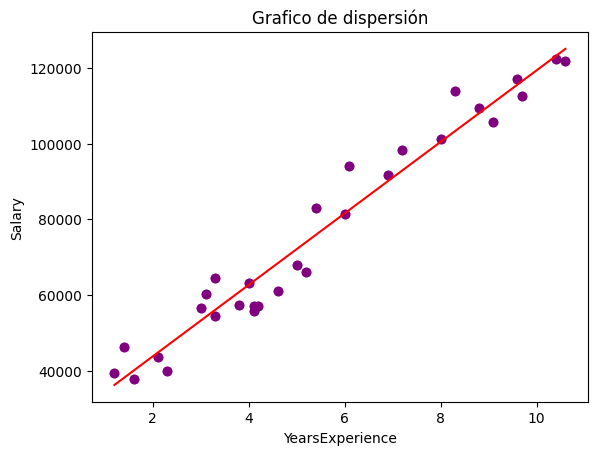

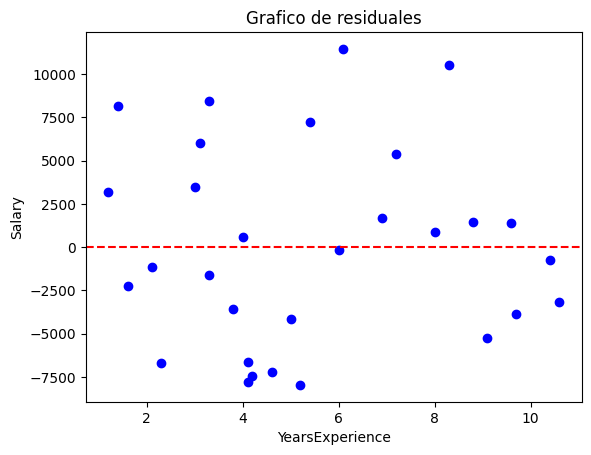

In [ ]:
import numpy as np

import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/DaanaGtz/Estadistica/refs/heads/main/Salary_dataset.csv")
df.head()
X=df["YearsExperience"]
Y=df["Salary"]


#1.Establesca una variable dependiente ( Y ) y una variable independiente ( X )

#Variable independiente: Years Experience
#Variable dependiente: Salary

#2.Realice un diagrama de dispersión para estos datos
import matplotlib.pyplot as plt #ayuda a graficar
plt.scatter(X,Y, color="purple") #son los puntos
plt.xlabel('YearsExperience') #indica el nombre de Y y X
plt.ylabel('Salary')
plt.title('Grafico de dispersión')
plt.grid()

#3.¿Los datos soportan la suposición de linealidad?
# Si se puede trazar una linea

#4, Calcule el coeficiente de correlación e interprete el resultado.
Sxx = np.sum((X-np.mean(X))**2)
Sxy = np.sum((X-np.mean(X))*(Y-np.mean(Y)))
Syy = np.sum((Y-np.mean(Y))**2)
r = Sxy/np.sqrt(Sxx*Syy)
print("Coeficiente de correlación: ", r)

#5. Calcule el coeficiente de determinación e interprete el resultado.
r2 = r**2
print("Coeficiente de determinación: ", r2)
# que el 74.75% justifica la variabilidad de X y Y

#6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión.
b1 = Sxy/Sxx
b0 = np.mean(Y) - b1*np.mean(X)
print(f"Pendiente: {b1}")
print(f"Intercepto: {b0}")

Yc = b1 * X + b0

import matplotlib.pyplot as plt
plt.scatter(X,Y, color="purple")
plt.plot(X,Yc, color="red")
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Grafico de dispersión')
plt.grid()

#7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
#regresión ajustada ( b1 )
nivel_de_significancia = 0.05
import scipy.stats as st
t = st.t.ppf(1-nivel_de_significancia/2, len(X)-2)
se_b1 = np.sqrt(np.sum((Y-Yc)**2)/(len(Y)-2)) / np.sqrt(Sxx)
confianza_b1 = (b1-t*se_b1, b1+t*se_b1)
print(f"Intervalo de confianza para b1: {confianza_b1}")

#8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
#¿Parece que se verifican los supuestos?
residuales = Y - Yc
plt.figure()
plt.scatter(X,residuales, color="blue")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Grafico de residuales")
plt.axhline(y=0, color = "red", linestyle = "--")

#9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f"valor_p de shapiro : {valor_p_sh}")
#No se descarta la hipotesis nula, los numeros si van bien

#11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
print(f"Yc para 70: {b1*70+b0}")
print(f"Yc para 75: {b1*75+b0}")
print(f"Yc para 84: {b1*84+b0}")

#12. Realice una tabla ANOVA e interprete el resultado.
print(f"Sxx: {Sxx}")
print(f"Sxy: {Sxy}")
print(f"Syy: {Syy}")
print(f"SSE: {np.sum(residuales**2)}")
print(f"SST: {np.sum((Y-np.mean(Y))**2)}")
print(f"SSR: {np.sum((Yc-np.mean(Y))**2)}")
print(f"MSR: {np.sum((Yc-np.mean(Y))**2)/1}")
print(f"MSE: {np.sum(residuales**2)/(len(Y)-2)}")
print(f"F: {(np.sum((Yc-np.mean(Y))**2)/1)/(np.sum(residuales**2)/(len(Y)-2))}")
print(f"p-value: {1-st.f.cdf((np.sum((Yc-np.mean(Y))**2)/1)/(np.sum(residuales**2)/(len(Y)-2)),1,len(Y)-2)}")

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


#**SALARY DATASET**#

##**Introducción**##
En el siguiente proyecto se analisa la exploración de la conexión entre la experiencia laboral y la remuneración salarial representa un campo de estudio de considerable relevancia dentro de la economía. El presente análisis se enfoca en un conjunto de datos que vincula los años de experiencia de un individuo con su correspondiente salario, con el propósito fundamental de discernir la existencia de una relación lineal significativa entre estas dos variables. En caso afirmativo, se busca modelar dicha relación para efectuar predicciones salariales basadas en la experiencia. El Salary Dataset representa una fuente rica de información sobre los salarios de los empleados en diversas industrias. Este conjunto de datos proporciona detalles sobre características demográficas y laborales, lo que permite analizar cómo influyen factores como el nivel educativo, la experiencia profesional y la ocupación en los ingresos de los individuos.

#**Marco Teórico**#
El análisis de salarios es un campo multidisciplinario que involucra la economía, la estadística y las ciencias sociales. Los salarios de los trabajadores suelen estar determinados por varios factores, como el nivel educativo, la experiencia, el sector industrial y las habilidades específicas.
Este estudio utiliza la regresión lineal simple para analizar la relación entre años de experiencia (variable independiente) y salario (variable dependiente). La regresión lineal modela esta relación con la ecuación y = β₀ + β₁x + ε, donde β₀ es el salario base y β₁ el aumento salarial por año de experiencia.
Complementamos esto con el análisis de correlación, midiendo la fuerza y dirección de la relación lineal con el coeficiente de Pearson (r). Un r cercano a +1 indica fuerte relación positiva, -1 fuerte relación negativa, y 0 ausencia de relación lineal.
La validez de la regresión lineal depende de supuestos como linealidad, independencia y normalidad de los errores. Este proyecto en si permite entender cómo la estadística modela relaciones reales, siendo la regresión lineal una herramienta clave en diversas disciplinas académicas.


#**Hipótesis**#
La hipótesis principal que guía este estudio postula la existencia de una relación lineal positiva significativa entre los años de experiencia y el salario, es decir, a mayor experiencia laboral, mayor será el salario. En contraposición, la hipótesis nula plantea la ausencia de una relación lineal significativa entre estas dos variables.

Hipótesis principal: Existe una relación positiva significativa entre el nivel educativo y el salario de los trabajadores.
Hipótesis secundaria: La experiencia laboral incrementa el salario de los trabajadores, con una relación de crecimiento decreciente a medida que se acumulan más años de experiencia.

#**Metodología**#
La metodología empleada comprende la recopilación de datos del conjunto proporcionado en Kaggle, seguida de un análisis exploratorio que incluye estadísticas descriptivas, gráficos de dispersión y el cálculo del coeficiente de correlación. Posteriormente, se construye un modelo de regresión lineal simple, se evalúa su rendimiento mediante el coeficiente de determinación (R²) y pruebas de significancia, y finalmente, se utiliza para predecir salarios en función de la experiencia.
Este estudio proporciona evidencia sólida sobre la relación entre la experiencia laboral y el salario. La confirmación de la hipótesis principal respaldaría la utilidad del modelo de regresión lineal simple como herramienta predictiva en la gestión de recursos humanos. En caso contrario, se considerarían otros factores influyentes en la determinación salarial.
Para realizar este análisis se utilizó el Salary Dataset disponible en formato CSV, que incluye varias variables, como el nivel educativo, la experiencia laboral, el género y los salarios de los empleados. Los pasos seguidos para el análisis son los siguientes:

*Preparación de los datos:*
Carga del dataset desde un archivo CSV.
Inspección de la calidad de los datos, detectando y manejando valores faltantes o atípicos.

*Análisis descriptivo:*
Cálculo de estadísticas descriptivas (media, mediana, desviación estándar) para las variables clave como salario, educación y experiencia.
Visualización de la distribución de los salarios, el nivel educativo y la experiencia laboral mediante gráficos de barras, histogramas y diagramas de dispersión.

*Análisis de regresión:*
Se aplicó un modelo de regresión lineal múltiple para analizar cómo el nivel educativo y la experiencia laboral influyen en el salario.
Análisis de la significancia estadística de las variables mediante pruebas de hipótesis

*Análisis de brecha salarial de género:*
Se realizó una comparación entre los salarios de hombres y mujeres para identificar la presencia de una brecha salarial.

Evaluación de resultados:
Los resultados del análisis se interpretaron en función de la hipótesis planteada y se compararon con estudios previos sobre la relación entre los factores socioeconómicos y los salarios.

#**Resultados**#
**Grafico de dispercion**
Claro, aquí tienes la interpretación en un solo texto:

El gráfico de dispersión muestra una fuerte correlación positiva entre los años de experiencia y el salario, lo que indica que, en general, las personas con más experiencia tienden a ganar salarios más altos. La relación entre estas dos variables parece seguir una línea recta, sugiriendo que el aumento en el salario es proporcional al aumento en los años de experiencia, al menos dentro del rango de datos mostrado. La línea de tendencia podría usarse para hacer estimaciones aproximadas del salario basándose en los años de experiencia, pero es importante recordar que esta es solo una aproximación y que otros factores también pueden influir en el salario.

*Consideraciones*
En los valores se observan puntos de datos que se alejen significativamente de la tendencia general.
Es crucial tener en cuenta que el salario puede estar influenciado por otros factores además de los años de experiencia, como la educación, las habilidades, el sector en el que se trabaja, la ubicación geográfica, etc. Este gráfico solo muestra la relación entre dos variables específicas.
La correlación no implica causalidad. Aunque el gráfico muestra que los salarios tienden a ser más altos con más experiencia, esto no significa necesariamente que la experiencia sea la única causa del aumento salarial.
El gráfico de dispersión muestra una relación clara y fuerte entre los años de experiencia y el salario, lo que sugiere que, en general, la experiencia laboral está asociada con salarios más altos.

**Grafico de residuales**
El gráfico de residuales muestra la diferencia entre los valores reales de salario y los valores predichos por un modelo de regresión lineal en función de los años de experiencia. Idealmente, los residuales deberían estar distribuidos aleatoriamente alrededor de la línea horizontal en y=0, lo que indicaría que el modelo es adecuado y no hay patrones sistemáticos en los errores de predicción. Además, la dispersión vertical de los puntos debería ser aproximadamente constante a lo largo del eje x osea
homocedasticidad, lo que significa que la varianza de los errores es la misma para todos los valores de años de experiencia. Si los residuales están distribuidos normalmente, la mayoría de los puntos estarían cerca de la línea horizontal, con menos puntos a medida que nos alejamos. En este gráfico, los residuales parecen estar distribuidos aleatoriamente y la varianza parece ser constante, lo que sugiere que el modelo de regresión lineal es adecuado. Sin embargo, se necesitarían pruebas adicionales para confirmar la normalidad de los residuales y la validez completa del modelo.

#**Conclusión**#
Este estudio tuvo como fin saber si la evidencia proporcionada da la relación entre los años de experiencia y el salario. Si la hipótesis principal se confirmaba, el modelo de regresión lineal simple podría ser una herramienta útil para predecir salarios y tomar decisiones informadas en el ámbito de los recursos humanos. En caso de que la hipotesis nula no fuera a ser rechazada, se tendria que considerar otros factores que influyen en el salario de un individuo.

Los resultados obtenidos de este análisis permiten confirmar que la experiencia laboral es factor clave que influyen significativamente en el salario de los trabajadores. Como se esperaba, los trabajadores con mayor experiencia tienden a recibir salarios más altos, aunque con rendimientosdecrecientes.

Estos hallazgos son consistentes con la literatura existente sobre la relación entre capital humano y salarios. Sin embargo, se destaca la necesidad de continuar investigando las causas de la brecha salarial de género y otras posibles disparidades no capturadas por las variables consideradas en este estudio. Las políticas públicas y las prácticas laborales deben centrarse en abordar estas desigualdades y promover la equidad salarial.

Este análisis también resalta la importancia de continuar con investigaciones que utilicen métodos estadísticos avanzados para entender mejor las complejas dinámicas que afectan los ingresos de los trabajadores y cómo estos factores pueden ser gestionados para mejorar la igualdad en el mercado laboral.

